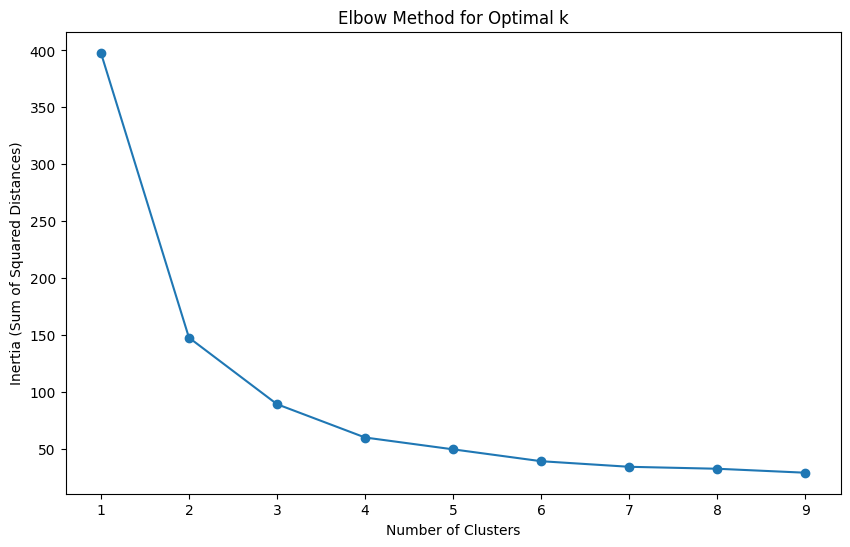

DB Index (k=5): 0.776661054409607


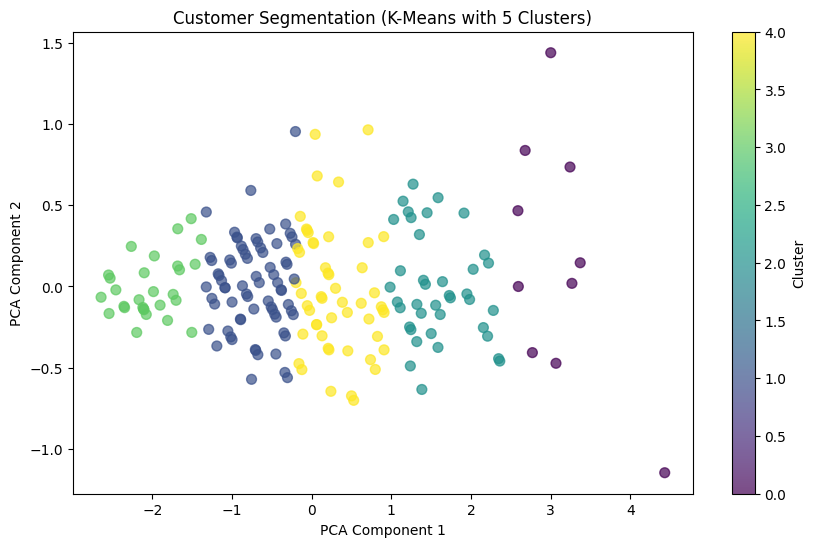

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction data by customer
transaction_summary = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Merge customer and transaction data
customer_data = pd.merge(customers, transaction_summary, on='CustomerID')

# Feature selection
features = customer_data[['TotalValue', 'Quantity']]  

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow Method for optimal k
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

# choosing the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_scaled)
customer_data['Cluster'] = kmeans.labels_

# Evaluating Clustering (DB Index)
db_index = davies_bouldin_score(features_scaled, customer_data['Cluster'])
print(f"DB Index (k={optimal_k}): {db_index}")

# Visualizing Clusters using PCA (2D projection)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'Customer Segmentation (K-Means with {optimal_k} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
